<a href="https://colab.research.google.com/github/Narendra69/Predctive-analytic/blob/optimal-prices/optimal_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("/dataset.csv")

In [ ]:
df = df.drop(columns=['Base_Price.1'])

In [ ]:
df['Effective_Price'] = df['Base_Price'] * (1 - df['Discount_Offered'] / 100)

In [ ]:
df_encoded = pd.get_dummies(df, columns=['Clicked_Ad', 'Customer_Segment', 'Event', 'Season'], drop_first=True)

In [ ]:
df_encoded = df_encoded.drop(columns=['Product_ID', 'Date', 'Revenue'])

In [ ]:
X = df_encoded.drop(columns=['Units_Sold'])
y = df_encoded['Units_Sold']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
price_range = np.linspace(100, 500, 100)
results = []

In [ ]:
avg_features = X.mean().to_dict()

In [ ]:
for price in price_range:
    simulated_input = avg_features.copy()
    simulated_input['Effective_Price'] = price

    input_df = pd.DataFrame([simulated_input])[X.columns]
    predicted_units = model.predict(input_df)[0]
    predicted_revenue = price * predicted_units
    results.append((price, predicted_units, predicted_revenue))

In [ ]:
results_df = pd.DataFrame(results, columns=['Price', 'Predicted_Demand', 'Predicted_Revenue'])
optimal = results_df.loc[results_df['Predicted_Revenue'].idxmax()]

In [ ]:
print("\n✅ Optimal Pricing Strategy:")
print(f"Optimal Price: ₹{optimal['Price']:.2f}")
print(f"Predicted Demand: {optimal['Predicted_Demand']:.2f} units")
print(f"Expected Revenue: ₹{optimal['Predicted_Revenue']:.2f}")


✅ Optimal Pricing Strategy:
Optimal Price: ₹500.00
Predicted Demand: 148.20 units
Expected Revenue: ₹74100.00


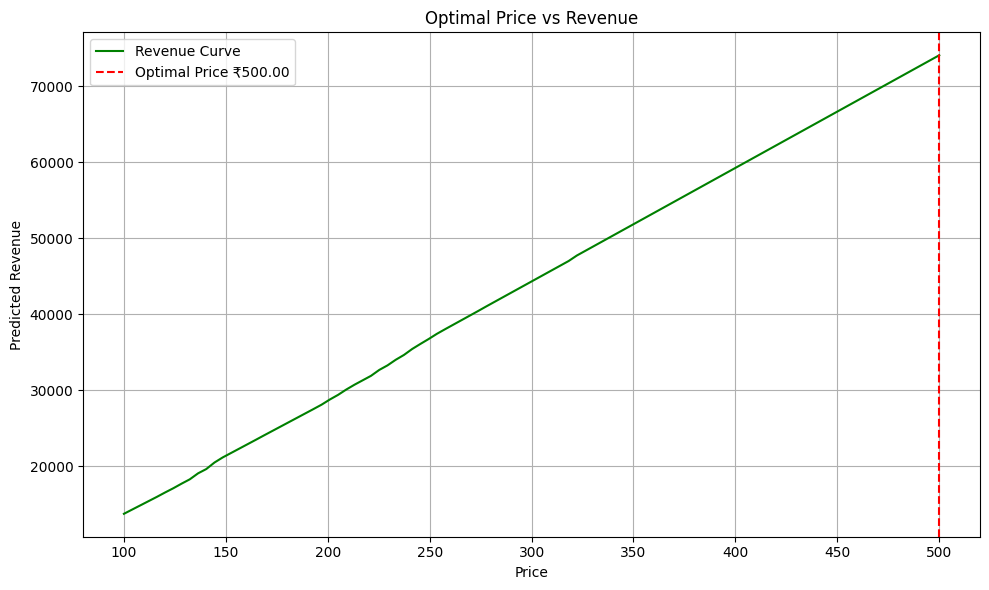

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(results_df['Price'], results_df['Predicted_Revenue'], label='Revenue Curve', color='green')
plt.axvline(optimal['Price'], color='red', linestyle='--', label=f"Optimal Price ₹{optimal['Price']:.2f}")
plt.xlabel('Price')
plt.ylabel('Predicted Revenue')
plt.title('Optimal Price vs Revenue')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()